PROYECTO INDIVIDUAL N°1

In [1]:
import ast 
import pandas as pd
from typing import Dict

In [2]:
pip list

Package              Version
-------------------- -----------
annotated-types      0.5.0
anyio                3.7.1
asttokens            2.2.1
backcall             0.2.0
certifi              2023.5.7
charset-normalizer   3.1.0
click                8.1.6
colorama             0.4.6
comm                 0.1.3
contourpy            1.0.7
cycler               0.11.0
debugpy              1.6.6
decorator            5.1.1
dnspython            2.4.1
email-validator      2.0.0.post2
et-xmlfile           1.1.0
executing            1.2.0
fastapi              0.100.1
fonttools            4.39.4
h11                  0.14.0
httpcore             0.17.3
httptools            0.6.0
httpx                0.24.1
idna                 3.4
ipykernel            6.22.0
ipython              8.11.0
itsdangerous         2.1.2
jedi                 0.18.2
Jinja2               3.1.2
joblib               1.3.1
jupyter_client       8.1.0
jupyter_core         5.3.0
kiwisolver           1.4.4
MarkupSafe           2.1.3
mat

In [3]:
rows = []
with open ('steam_games.json', encoding = 'utf-8') as f: # f contains the data of the archive
    for line in f.readlines():
        rows.append(ast.literal_eval(line))

df1 = pd.DataFrame(rows)
df1['release_date'] = pd.to_datetime(df1['release_date'], format='%Y-%m-%d', errors='coerce')
dff = df1.dropna(subset= ['release_date'])
dff['release_date'] = pd.to_datetime(dff['release_date'])

C:\Users\USER\AppData\Local\Temp\ipykernel_20444\3863025531.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['release_date'] = pd.to_datetime(dff['release_date'])


In [4]:
df_anid = dff.explode('genres')

In [5]:
def genero(year: int):
    df = df_anid[['release_date','genres']]
    years = pd.to_datetime(year,format = '%Y').to_period('Y')
    df_filter = df[df['release_date'].dt.to_period('Y') == years]
    df_top = df_filter['genres'].value_counts()
    top_genres = df_top.head(5)
    return {year: top_genres.to_dict()}

In [6]:
genero(2019)

{2019: {'Action': 2, 'Adventure': 2, 'Indie': 2, 'RPG': 2, 'Strategy': 1}}

In [7]:
def juegos(year: int):
    df = dff[['release_date','app_name']]
#Convert the time to datetime object.Then it converts the datetime object to period object with a yearly frequency
    years = pd.to_datetime(year,format = '%Y').to_period('Y')
#Filter the selectiong the rows only when the period is equal to the year stored in the variable
    df_filter = df[df['release_date'].dt.to_period('Y') == years]
#Converted the column into a list and contain it in the variable
    juegos_lanzados = df_filter['app_name'].astype(str).tolist()
    juegos_dict = {juego for juego in juegos_lanzados}
    return {year: juegos_dict}

In [8]:
print(juegos(2014))

{2014: {'Year Walk', 'Rocksmith® 2014 – Godsmack - “Awake”', "Uriel's Chasm", 'KickBeat Steam Edition', "Bosch's Damnation", 'Episode 9 - The Master Thief', 'Van Helsing II: Pigasus', 'The Inner World Soundtrack', 'Space Hulk - Harbinger of Torment Campaign', 'Line Of Defense Tactics - Tactical Advantage', 'Soft In The Head', 'War in a Box: Paper Tanks', 'Rocksmith® 2014 – Foreigner - “Juke Box Hero”', 'Descent 3', 'Fantasy Grounds - Savage Worlds: ETU - East Texas University', 'Middle-earth: Shadow of Mordor - Lord of the Hunt', 'Dragon: The Game', 'Expansion - Europa Universalis IV: Res Publica', 'My Lands: Miner’s Luck - Starter DLC Pack', 'Depth - SDK', 'Everlasting Summer', 'Merchants of Kaidan Demo', 'Rocksmith® 2014 – Rage Against the Machine Song Pack (I-II)', 'Heavy Bullets EP - Soundtrack', 'aerofly RC 7', 'Dokuro', 'DW8XLCE - POWERFUL WEAPON PACK', 'Rocksmith® 2014 – System of a Down Song Pack', 'Detective Grimoire', 'Don Bradman Cricket 14', 'Rocksmith® 2014 – Billy Squier 

In [9]:
def specs(year: int):
    df = dff[['release_date','specs']]
    years = pd.to_datetime(year,format = '%Y').to_period('Y')
    df_filter = df[df['release_date'].dt.to_period('Y') == years]
    df_filter = df_filter.explode('specs')
    df_top = df_filter['specs'].value_counts()
    top_specs = df_top.head(5)
    return {year: top_specs.to_dict()}

In [10]:
specs(2014)

{2014: {'Single-player': 2481,
  'Steam Achievements': 1722,
  'Steam Trading Cards': 1384,
  'Downloadable Content': 1338,
  'Steam Cloud': 1217}}

In [11]:
def earlyaccess(year: int):
    df = dff[['release_date','early_access']]
    years = pd.to_datetime(year,format = '%Y').to_period('Y')
    df_filter = df[df['release_date'].dt.to_period('Y') == years]    
    juegos_early = df_filter['early_access']
    juegos_dict = {juego for juego in juegos_early if juego == True}
    return {year: juegos_dict}
    

In [12]:
def earlyaccess(year: int):
    df = dff[['release_date','early_access']]
    years = pd.to_datetime(year,format = '%Y').to_period('Y')
    df_filter = df[df['release_date'].dt.to_period('Y') == years]    
    juegos_early = df_filter['early_access']
    num_early_access = juegos_early.value_counts() #Sum the true values of the juegos_early variable
    return {year: num_early_access.to_dict()}

In [13]:
earlyaccess(2018)

{2018: {False: 75, True: 21}}

In [14]:
def sentiment( year : int):
    dfs = dff[['sentiment','release_date']]
    #Use isin to created a boolean series that indicate the value of the column
    #The ~ operator is used to invert the boolean series. 
    mask = ~dfs['sentiment'].isin(['Overwhelmingly Positive','Mostly Positive','Very Positive','Positive', 'Mixed', 'Negative','Mostly Negative','Very Negative','Overwhelmingly Negative'])
    #Select the rows where the mask is True and set that values in the column for None
    dfs.loc[mask, 'sentiment'] = 'None'
    years = pd.to_datetime(year,format = '%Y').to_period('Y')
    df_filter = dfs[dfs['release_date'].dt.to_period('Y') == years]    
    critics = df_filter['sentiment']
    num_critics = critics.value_counts() #Count the values True and False of the column
    return {year: num_critics.to_dict()}
    

In [15]:
sentiment(2014)

{2014: {'None': 1196,
  'Mixed': 467,
  'Very Positive': 429,
  'Mostly Positive': 333,
  'Positive': 236,
  'Mostly Negative': 99,
  'Overwhelmingly Positive': 37,
  'Negative': 27,
  'Very Negative': 7,
  'Overwhelmingly Negative': 1}}

ANALISIS EXPLORATORIO DE DATOS

Primero vamos a limpiar los datos con el fin de trabajar el modelo con datos limpios

In [16]:
# import the libraries
import numpy as np
import pandas as pd
import ast

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [17]:
rows = []
with open ('steam_games.json', encoding = 'utf-8') as f: # f contains the data of the archive
    for line in f.readlines():
        rows.append(ast.literal_eval(line))

df1 = pd.DataFrame(rows)
df1['release_date'] = pd.to_datetime(df1['release_date'], format='%Y-%m-%d', errors='coerce')
dff = df1.dropna(subset= ['release_date'])
dff['release_date'] = pd.to_datetime(dff['release_date'])

C:\Users\USER\AppData\Local\Temp\ipykernel_20444\3863025531.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['release_date'] = pd.to_datetime(dff['release_date'])


In [18]:
#Make a copy of the original DT to prevent a advice and work easily
dfc1 = dff.copy()

In [19]:
#Create a new column only with the year 
dfc1['year'] = dfc1['release_date'].dt.year

In [20]:
#Select the columns to work
dfc1 = dfc1[['genres','year','price','early_access','sentiment']]

In [21]:
#Replace de # user reviews using r'\d+ user reviews', r to indicate a raw str, \d+ to matches 0-9 digits and more than one digit
dfc1['sentiment'] = dff['sentiment'].replace(to_replace=r'\d+ user reviews', value=0, regex=True)

In [22]:
#Drop the NaN values in the dataframe
dfc1.dropna(inplace = True)

In [23]:
dfc1.sort_values(['year'], inplace = True)

In [24]:
dfc1.reset_index(inplace = True, drop  = True)
dfc1.tail()

,genres,year,price,early_access,sentiment
21770,"[Action, Adventure, Casual, Indie, Simulation,...",2018,29.99,True,Mixed
21771,"[Design &amp; Illustration, Education, Utilities]",2018,14.99,False,0
21772,"[Free to Play, Indie, RPG, Strategy]",2018,Free To Play,False,Mostly Positive
21773,"[Action, Adventure, Indie, RPG, Strategy, Earl...",2019,14.99,True,0
21774,"[Adventure, Indie, RPG]",2021,4.99,False,Positive


In [25]:
#Replace the distic values that aren't numeric
dfc1['price'] = pd.to_numeric(dfc1['price'], errors='coerce')

In [26]:
dfc1['price'] = dfc1['price'].fillna(0)

In [27]:
dfc1.tail(5)

,genres,year,price,early_access,sentiment
21770,"[Action, Adventure, Casual, Indie, Simulation,...",2018,29.99,True,Mixed
21771,"[Design &amp; Illustration, Education, Utilities]",2018,14.99,False,0
21772,"[Free to Play, Indie, RPG, Strategy]",2018,0.00,False,Mostly Positive
21773,"[Action, Adventure, Indie, RPG, Strategy, Earl...",2019,14.99,True,0
21774,"[Adventure, Indie, RPG]",2021,4.99,False,Positive


In [28]:
#Transform bool to binary
dfc1['early_access'] = dfc1['early_access'].astype(int)

In [29]:
dfc1

,genres,year,price,early_access,sentiment
0,"[Action, Adventure, Casual]",1983,9.99,0,Very Positive
1,"[Action, Adventure, Casual]",1984,9.99,0,Very Positive
2,"[Casual, Indie]",1984,1.99,0,Positive
3,[Simulation],1985,6.99,0,0
4,"[Adventure, Casual, Indie, RPG, Simulation]",1986,7.99,0,Mixed
...,...,...,...,...,...
21770,"[Action, Adventure, Casual, Indie, Simulation,...",2018,29.99,1,Mixed
21771,"[Design &amp; Illustration, Education, Utilities]",2018,14.99,0,0
21772,"[Free to Play, Indie, RPG, Strategy]",2018,0.00,0,Mostly Positive
21773,"[Action, Adventure, Indie, RPG, Strategy, Earl...",2019,14.99,1,0


In [30]:
dfc1.dtypes

genres           object
year              int32
price           float64
early_access      int32
sentiment        object
dtype: object

In [31]:
dfc2 = dfc1.copy()

In [32]:
dfc2.head(10)

,genres,year,price,early_access,sentiment
0,"[Action, Adventure, Casual]",1983,9.99,0,Very Positive
1,"[Action, Adventure, Casual]",1984,9.99,0,Very Positive
2,"[Casual, Indie]",1984,1.99,0,Positive
3,[Simulation],1985,6.99,0,0
4,"[Adventure, Casual, Indie, RPG, Simulation]",1986,7.99,0,Mixed
5,[Simulation],1987,6.99,0,0
6,"[Adventure, Simulation]",1987,6.99,0,Mixed
7,[Adventure],1987,5.99,0,Mixed
8,[Adventure],1987,9.99,0,Mostly Positive
9,"[Adventure, Indie, RPG, Strategy]",1988,5.99,0,Very Positive


In [33]:
#Make a dict varible in order to change the sentiment to number
mapping = {'Overwhelmingly Positive':9,'Very Positive': 8,'Mostly Positive':7, 'Positive': 6, 'Mixed': 5,'Mostly Negative':4,'Negative': 3, 'Very Negative': 2,'Overwhelmingly Negative':1}
dfc2['sentiment'] = dfc2['sentiment'].replace(mapping)

In [34]:
dfc2

,genres,year,price,early_access,sentiment
0,"[Action, Adventure, Casual]",1983,9.99,0,8
1,"[Action, Adventure, Casual]",1984,9.99,0,8
2,"[Casual, Indie]",1984,1.99,0,6
3,[Simulation],1985,6.99,0,0
4,"[Adventure, Casual, Indie, RPG, Simulation]",1986,7.99,0,5
...,...,...,...,...,...
21770,"[Action, Adventure, Casual, Indie, Simulation,...",2018,29.99,1,5
21771,"[Design &amp; Illustration, Education, Utilities]",2018,14.99,0,0
21772,"[Free to Play, Indie, RPG, Strategy]",2018,0.00,0,7
21773,"[Action, Adventure, Indie, RPG, Strategy, Earl...",2019,14.99,1,0


In [35]:
dfc2.dtypes

genres           object
year              int32
price           float64
early_access      int32
sentiment         int64
dtype: object

In [36]:
dfc2['price'].describe()

count    21775.000000
mean         9.341319
std         14.127213
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        771.710000
Name: price, dtype: float64

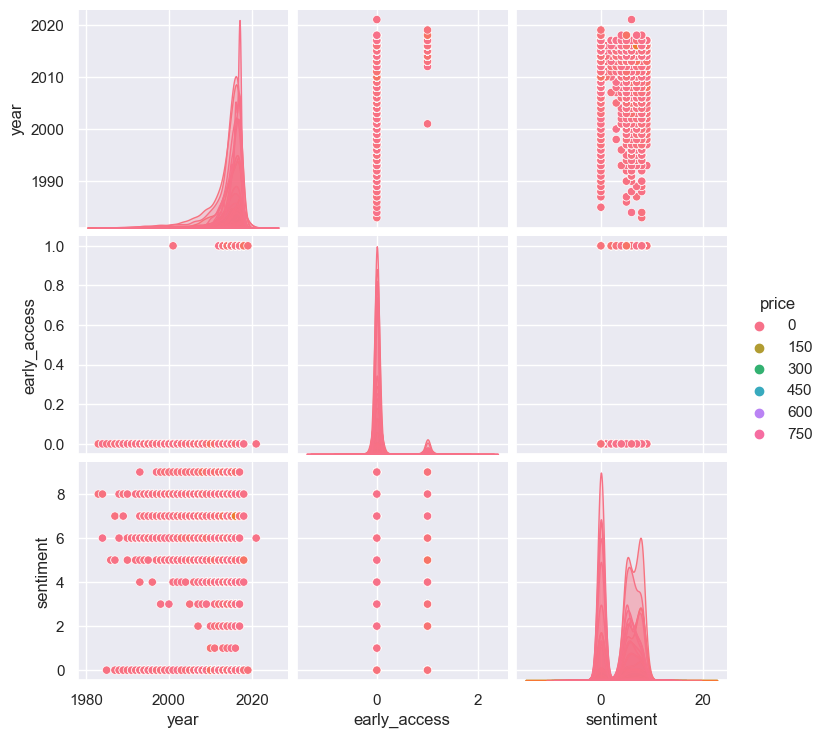

In [37]:
sns.pairplot(dfc2, hue = 'price',palette='husl')
plt.show()

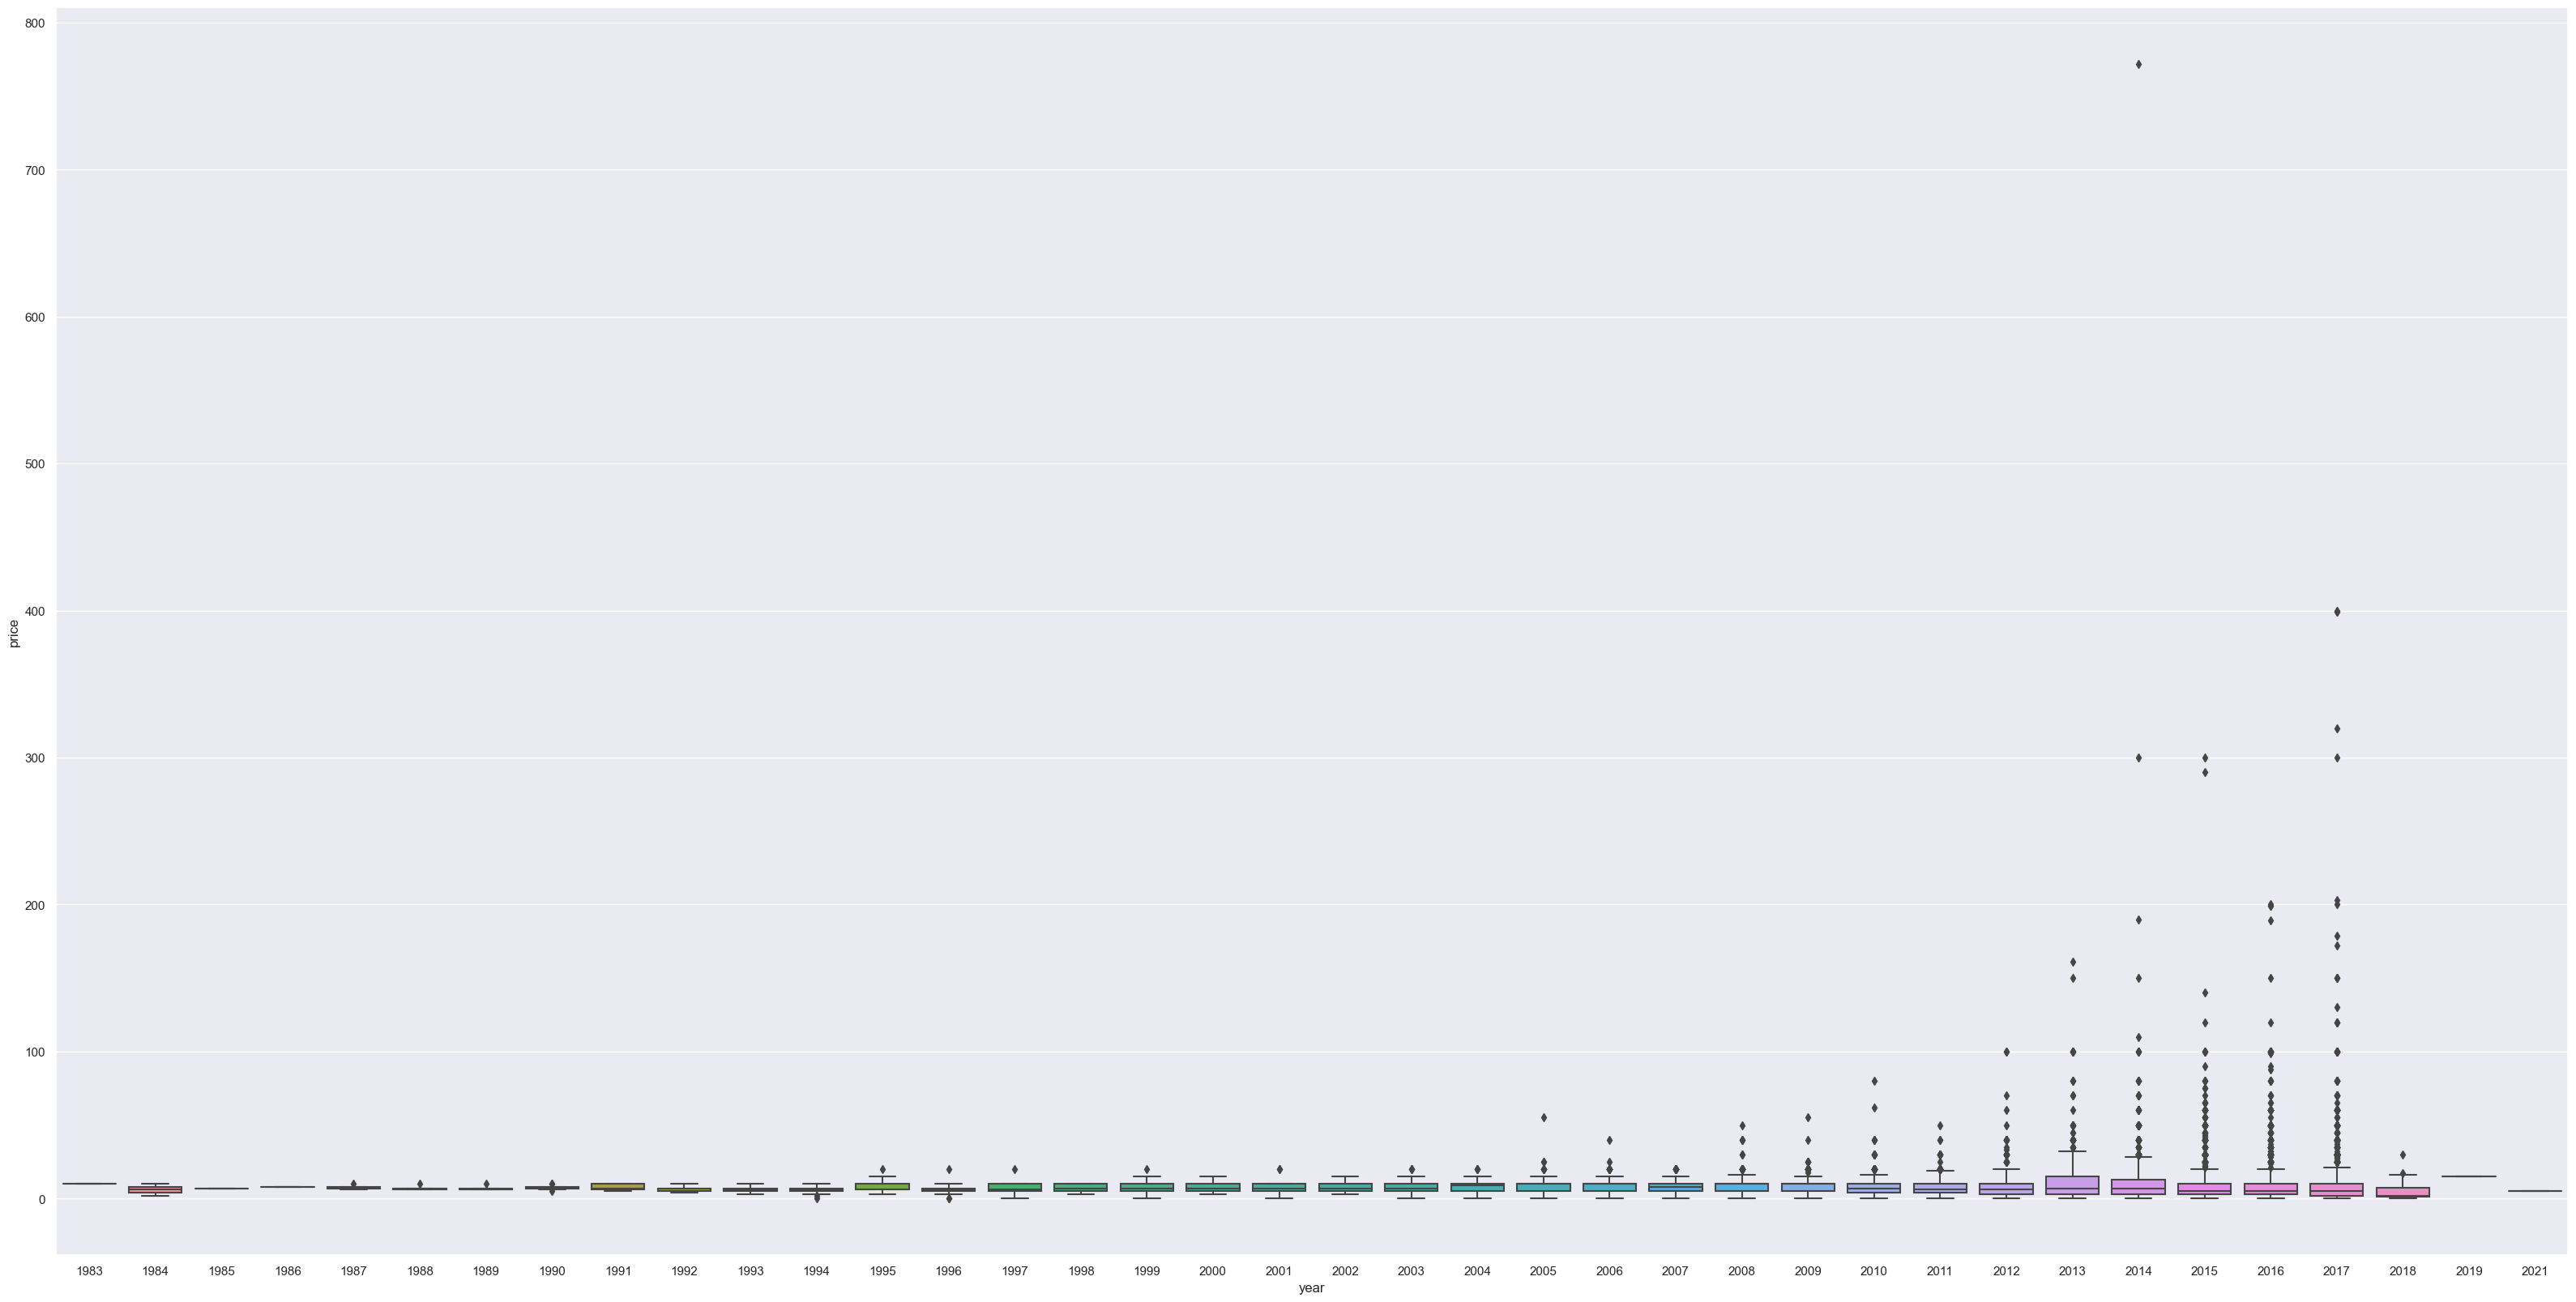

In [38]:
# Do a boxplot to determine the outliers
plt.figure(figsize=(40, 20))
sns.boxplot(x='year', y='price', data=dfc2)
plt.show()


In [39]:
#Clean the outliers in price because the graphic show a lot of it and will change the prediction
dfc2 = dfc2.loc[dfc2['price'] <= 80]

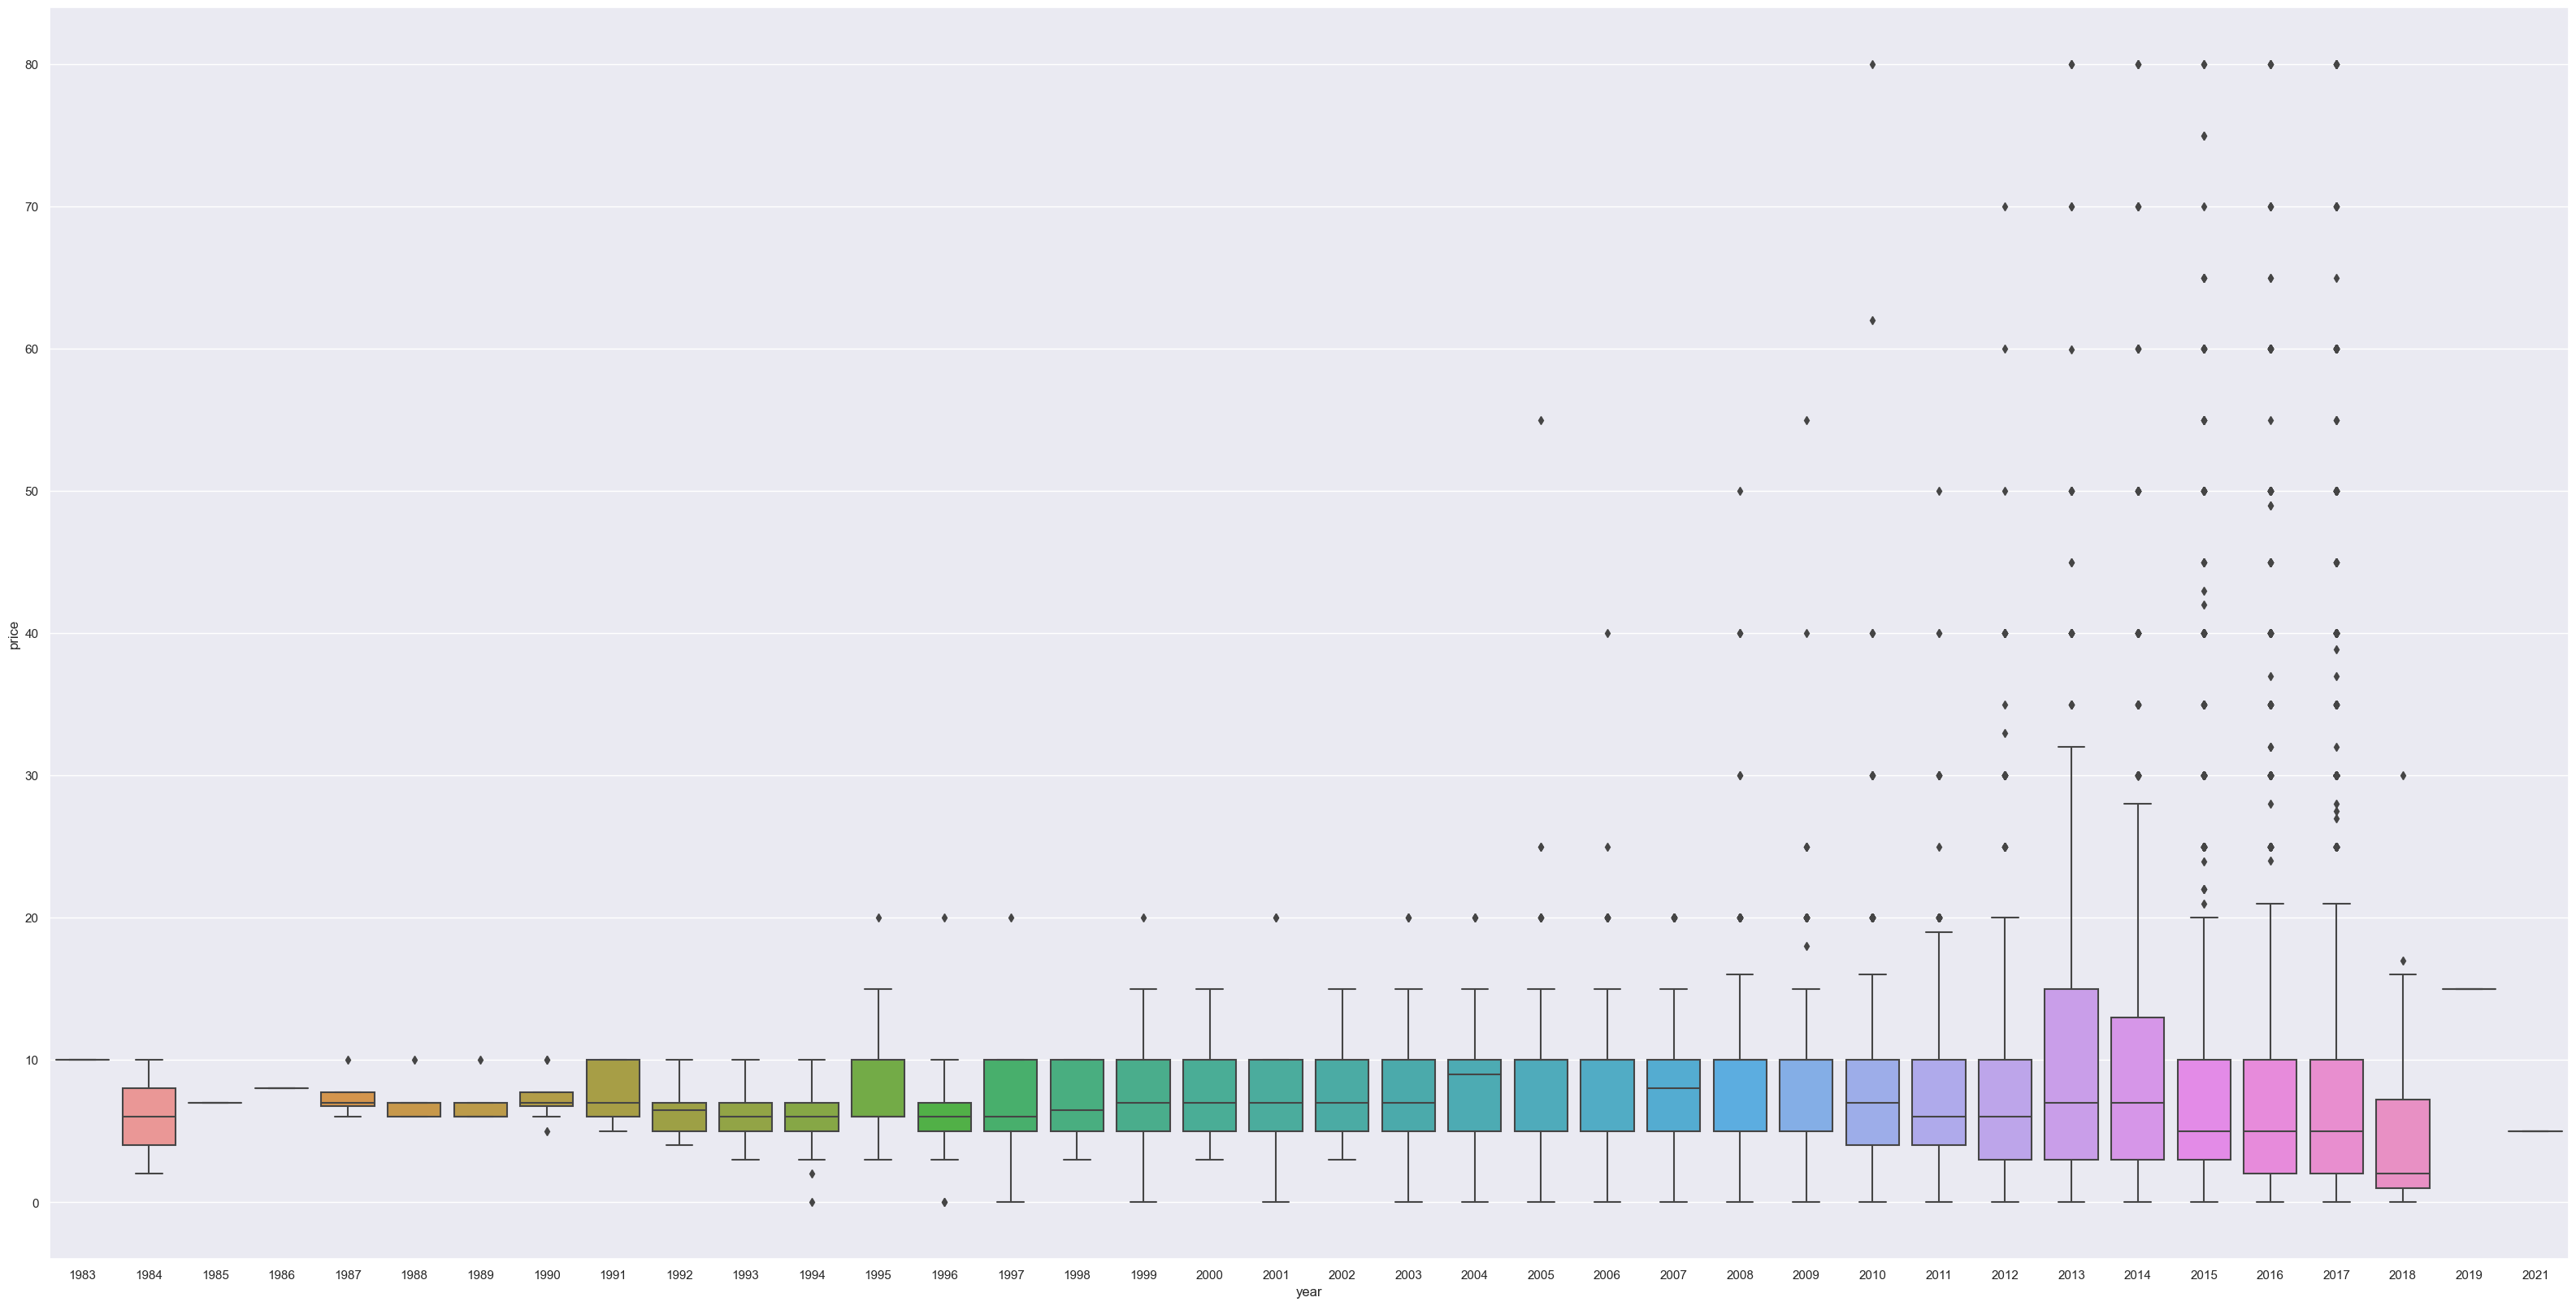

In [40]:
plt.figure(figsize=(40, 20))
sns.boxplot(x='year', y='price', data=dfc2)
plt.show()

In [41]:
#Unnest the colum genres in df_anid to continue
df_anid = dfc2.explode('genres')

In [42]:
#To plot the df choose a specific period of time and a genre to see the dates 
x = df_anid[(df_anid['genres']=='Action' )]['year']
y = df_anid[(df_anid['genres']=='Action' )]['price']

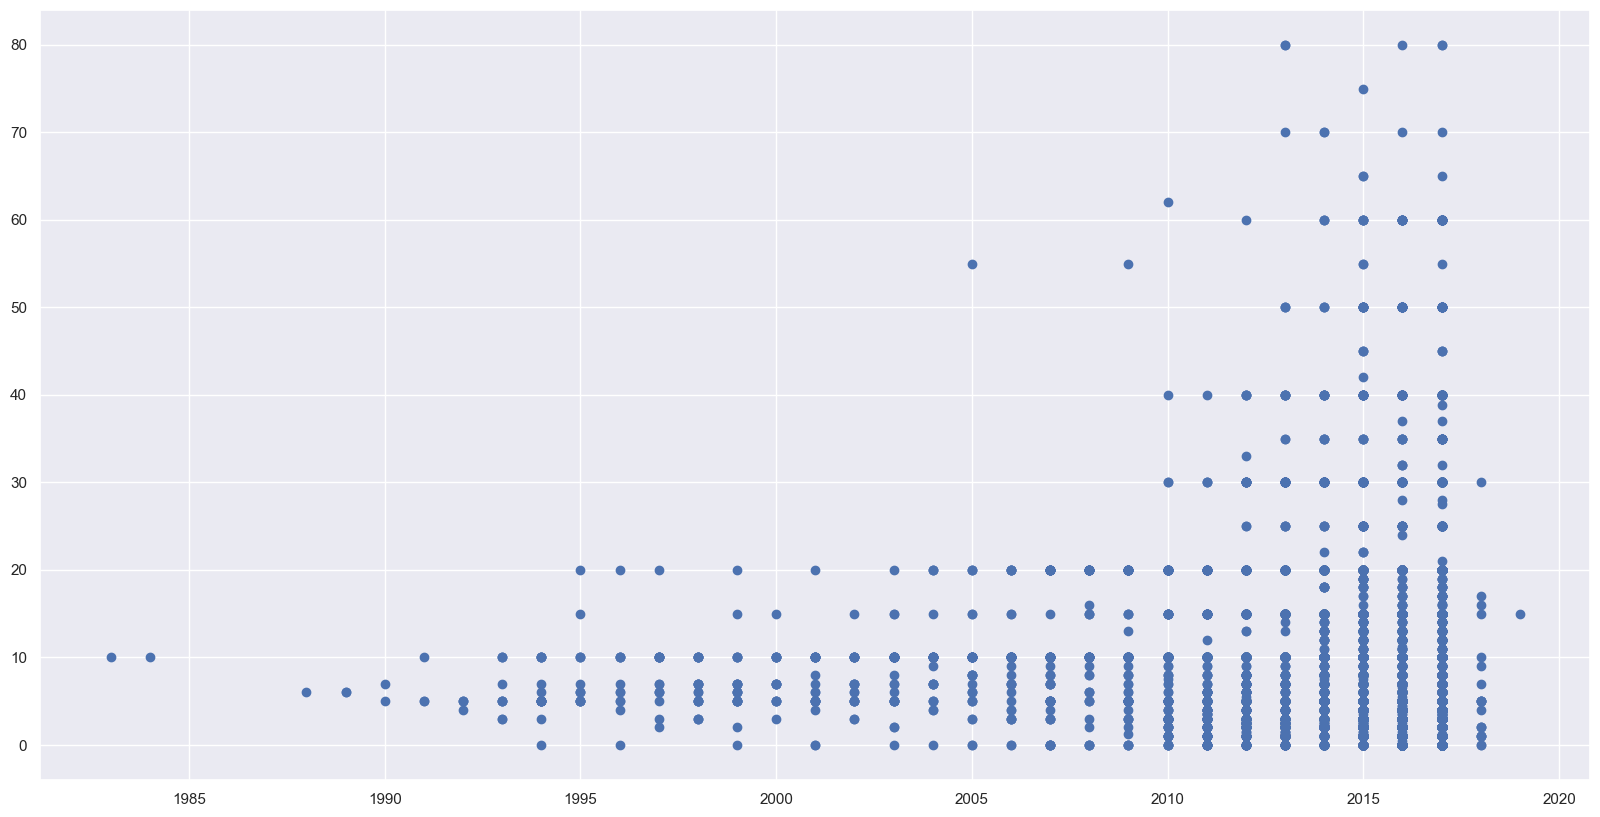

In [43]:
# Plot
plt.figure(figsize=(20, 10))
plt.scatter(x, y)
plt.show()

In [116]:
#filter for a period of time
df_filtered = df_anid.loc[df_anid['year'] >= 1985]

In [46]:
#Check how many values we have
df_filtered['genres'].value_counts()

genres
Indie                        10824
Action                        7359
Adventure                     5723
Casual                        5079
Simulation                    3888
Strategy                      3760
RPG                           3066
Early Access                  1292
Free to Play                  1244
Sports                         811
Massively Multiplayer          721
Racing                         662
Design &amp; Illustration      290
Utilities                      202
Web Publishing                 170
Animation &amp; Modeling       122
Education                       79
Software Training               66
Video Production                64
Audio Production                44
Photo Editing                   34
Accounting                       3
Name: count, dtype: int64

In [117]:
#Make a one hot encoding 
df_encoded = pd.get_dummies(df_filtered, columns=['genres'],dtype=int)

In [118]:
#Check how many values we have
df_encoded.dtypes

year                                  int32
price                               float64
early_access                          int32
sentiment                             int64
genres_Accounting                     int32
genres_Action                         int32
genres_Adventure                      int32
genres_Animation &amp; Modeling       int32
genres_Audio Production               int32
genres_Casual                         int32
genres_Design &amp; Illustration      int32
genres_Early Access                   int32
genres_Education                      int32
genres_Free to Play                   int32
genres_Indie                          int32
genres_Massively Multiplayer          int32
genres_Photo Editing                  int32
genres_RPG                            int32
genres_Racing                         int32
genres_Simulation                     int32
genres_Software Training              int32
genres_Sports                         int32
genres_Strategy                 

In [119]:
#Only left tthe values 1-9
df_encoded = df_encoded[df_encoded['sentiment'] != 0]

In [51]:
#X = df_encoded[['genres_Indie','genres_Action','genres_Adventure','genres_Casual','genres_Simulation','genres_Strategy','genres_RPG','genres_Early Access','genres_Free to Play','genres_Sports','genres_Massively Multiplayer','genres_Racing','genres_Design &amp; Illustration','year']]
#y = df_encoded['price']

Desicion Tree

In [121]:
# We select the predictor variables X and the variable to predict y

X = df_encoded[['genres_Indie','genres_Action','genres_Adventure','genres_Casual','genres_Simulation','genres_Strategy','genres_RPG','genres_Early Access','genres_Free to Play','genres_Sports','genres_Massively Multiplayer','genres_Racing','genres_Design &amp; Illustration','genres_Education','genres_Photo Editing','genres_Software Training','genres_Utilities','genres_Video Production','genres_Web Publishing','year']]
y = df_encoded['price']

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(23751, 20) (23751,) (10180, 20) (10180,)


In [123]:
print('Proporción de etiquetas en set de entrenamiento:', y_train.sum()/y_train.count())
print('Proporción de etiquetas en set de testeo:', y_test.sum()/y_test.count())

Proporción de etiquetas en set de entrenamiento: 8.936002694623385
Proporción de etiquetas en set de testeo: 8.976480353634576


In [124]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=None)
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [125]:
y_train_pred = tree.predict(X_train)

In [126]:
y_test_pred = tree.predict(X_test)

In [127]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import mean_squared_error

rmse_train = (mean_squared_error(y_train, y_train_pred, squared = False))
rmse_test = (mean_squared_error(y_test, y_test_pred, squared = False))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')



Raíz del error cuadrático medio en Train: 8.946708646709263
Raíz del error cuadrático medio en Test: 9.187317476965843


In [128]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_test_pred)
print('El coeficiente de determinación del regresor es:', r2)

El coeficiente de determinación del regresor es: 0.05583182575582479


RANDOM FOREST

In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [172]:
X = df_encoded[['early_access','sentiment','genres_Indie','genres_Action','genres_Adventure','genres_Casual','genres_Simulation','genres_Strategy','genres_RPG','genres_Early Access','genres_Free to Play','genres_Sports','genres_Massively Multiplayer','genres_Racing','genres_Design &amp; Illustration','year']]
y = df_encoded['price']

In [173]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(23751, 16) (23751,) (10180, 16) (10180,)


In [174]:
rf = RandomForestRegressor(n_estimators = 100, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(X_train, y_train)

In [175]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [176]:
#Calculate the RMSE
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import mean_squared_error

rmse_train = (mean_squared_error(y_train, y_train_pred, squared = False))
rmse_test = (mean_squared_error(y_test, y_test_pred, squared = False))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')


Raíz del error cuadrático medio en Train: 9.155069284865055
Raíz del error cuadrático medio en Test: 9.145594677312426


In [177]:
#Calculate the R^2
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_test_pred)
print('El coeficiente de determinación del regresor es:', r2)

El coeficiente de determinación del regresor es: 0.0643879446127178


In [178]:
# Fit GridSearchCV
CV_rfr.fit(X_train, y_train)

# Get cross-validation results
cv_results = CV_rfr.cv_results_

# Print mean test scores for each value of n_estimators
for n, mean_test_score in zip(cv_results['param_n_estimators'], cv_results['mean_test_score']):
    print(f'n_estimators: {n}, mean_test_score: {mean_test_score}')

# Get best hyperparameters
best_params = CV_rfr.best_params_
best_n_estimators = best_params['n_estimators']

print(f'Best n_estimators: {best_n_estimators}')

n_estimators: 1, mean_test_score: 0.018616046378244544
n_estimators: 2, mean_test_score: 0.041961332755737255
n_estimators: 3, mean_test_score: 0.044547061463309376
n_estimators: 4, mean_test_score: 0.04571863397726354
n_estimators: 5, mean_test_score: 0.04455129610788868
n_estimators: 10, mean_test_score: 0.047375741902052404
n_estimators: 25, mean_test_score: 0.046718603635219534
n_estimators: 50, mean_test_score: 0.04583050873752437
n_estimators: 100, mean_test_score: 0.04592393308981002
n_estimators: 150, mean_test_score: 0.046441403311351846
n_estimators: 200, mean_test_score: 0.04620900966737973
n_estimators: 250, mean_test_score: 0.046177021018132015
n_estimators: 500, mean_test_score: 0.04652520160766438
n_estimators: 1000, mean_test_score: 0.046414002386782595
n_estimators: 1, mean_test_score: 0.018616046378244544
n_estimators: 2, mean_test_score: 0.041961332755737255
n_estimators: 3, mean_test_score: 0.044547061463309376
n_estimators: 4, mean_test_score: 0.04571863397726354
n

In [179]:
#Try again the model with the best estimator
rf = RandomForestRegressor(n_estimators = 500, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(X_train, y_train)

In [180]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [181]:
#Calculate the RMSE
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import mean_squared_error

rmse_train = (mean_squared_error(y_train, y_train_pred, squared = False))
rmse_test = (mean_squared_error(y_test, y_test_pred, squared = False))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 9.150060861186423
Raíz del error cuadrático medio en Test: 9.139743661745596


In [182]:
#Calculate the R^2
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_test_pred)
print('El coeficiente de determinación del regresor es:', r2)

El coeficiente de determinación del regresor es: 0.06558470212752365


In [186]:
import pickle

# Save the trained model and RMSE values to a file
with open('model_and_rmse.pkl', 'wb') as file:
    pickle.dump((rf, rmse_train, rmse_test), file)